In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
raw = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dc-ds-060120/master/mod-4/week-3/Mod_4_Project/time-series/zillow_data.csv')

In [6]:
raw = raw.drop('RegionID', axis=1)

In [9]:
raw = raw.drop('SizeRank', axis=1)

In [10]:
raw.head()

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [11]:
melted = pd.melt(raw, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])
melted.head()

,RegionName,City,State,Metro,CountyName,time,value
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [12]:
melted.groupby('time').aggregate({'value':'mean'})

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [15]:
melted['year'] = melted.time.dt.year
melted

,RegionName,City,State,Metro,CountyName,time,value,year
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.0,1996
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0,1996
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.0,1996
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.0,1996
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0,1996
...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0,2018
3901591,3293,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0,2018
3901592,40404,Berea,KY,Richmond,Madison,2018-04-01,133400.0,2018
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.0,2018


In [28]:
melted['year'] = melted.time.dt.year


count    1.472300e+04
mean     3.058703e+05
std      3.870530e+05
min      2.220000e+04
25%      1.382000e+05
50%      2.129000e+05
75%      3.533000e+05
max      1.931490e+07
Name: value, dtype: float64

In [32]:
zip_by_year = melted.groupby(['RegionName', 'year']).max()
zip_by_year

City State        Metro         CountyName       time  \
RegionName year                                                               
1001       1996     Agawam    MA  Springfield            Hampden 1996-12-01   
           1997     Agawam    MA  Springfield            Hampden 1997-12-01   
           1998     Agawam    MA  Springfield            Hampden 1998-12-01   
           1999     Agawam    MA  Springfield            Hampden 1999-12-01   
           2000     Agawam    MA  Springfield            Hampden 2000-12-01   
...                    ...   ...          ...                ...        ...   
99901      2014  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2014-12-01   
           2015  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2015-12-01   
           2016  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2016-12-01   
           2017  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2017-12-01   
           2018  Ketchikan    AK    Ketchikan  Ketchikan Gateway 2018-04-01   

                       value  
RegionName year               
1001       1996 113100.00000  
           1997 114800.00000  
           1998 117500.00000  
           1999 122600.00000  
           2000 129400.00000  
...                      ...  
99901      2014 267100.00000  
           2015 278600.00000  
           2016 284100.00000  
           2017 291900.00000  
           2018 305100.00000  

[325560 rows x 6 columns]

In [29]:
dir(pd.describe)

AttributeError: module 'pandas' has no attribute 'describe'

In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
melted.groupby(['RegionName']).value.max().describe()

count      14723.00000
mean      305870.27100
std       387052.96398
min        22200.00000
25%       138200.00000
50%       212900.00000
75%       353300.00000
max     19314900.00000
Name: value, dtype: float64

In [33]:
raw.head()

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.00000,335400.00000,336500.00000,337600.00000,338500.00000,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.00000,236900.00000,236700.00000,235400.00000,233300.00000,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.00000,212200.00000,212200.00000,210700.00000,208300.00000,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.00000,500900.00000,503100.00000,504600.00000,505500.00000,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.00000,77300.00000,77300.00000,77300.00000,77400.00000,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [34]:
melted

,RegionName,City,State,Metro,CountyName,time,value,year
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.00000,1996
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.00000,1996
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.00000,1996
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.00000,1996
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.00000,1996
...,...,...,...,...,...,...,...,...
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.00000,2018
3901591,3293,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.00000,2018
3901592,40404,Berea,KY,Richmond,Madison,2018-04-01,133400.00000,2018
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.00000,2018


In [47]:
# Make a list of all zipcodes appearing at least 60 times (observations are monthly so this translates to five years worth of data)
melted.RegionName.value_counts() \
    [melted.RegionName.value_counts() > 60] \
    .index.to_list()

TypeError: 'function' object is not iterable

In [57]:
# MVP: Fit and Predict for One Zipcode, show accuracy over time
one_zip = melted[melted['RegionName'] == 20007]

one_zip = one_zip[['time', 'value']]
one_zip = one_zip.set_index('time')
one_zip

,value
time,
1996-04-01,358100.00000
1996-05-01,356000.00000
1996-06-01,353900.00000
1996-07-01,351700.00000
1996-08-01,349600.00000
...,...
2017-12-01,1296500.00000
2018-01-01,1293000.00000
2018-02-01,1291200.00000


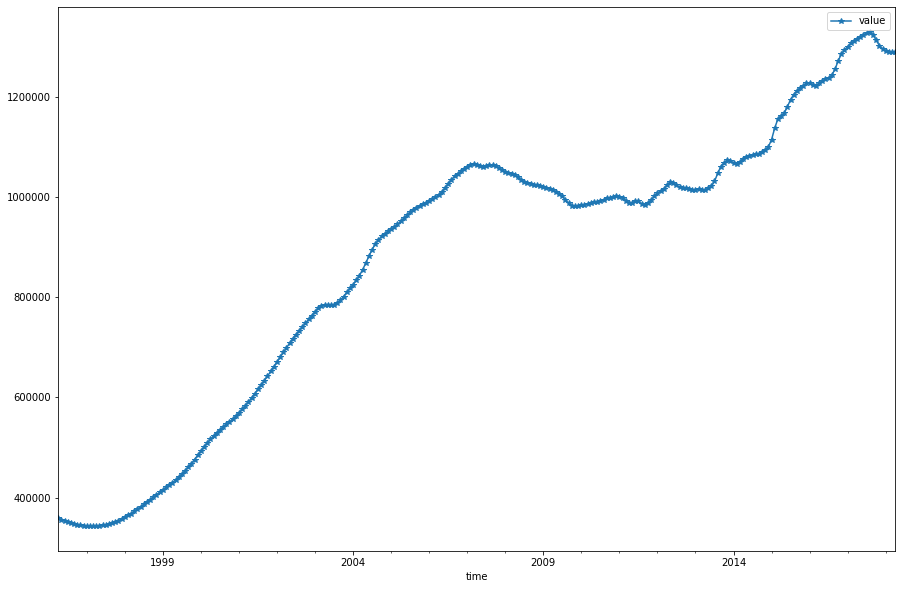

In [68]:
# Visualize the data over time

fig, ax = plt.subplots(figsize=(15,10))
one_zip.plot(marker='*', ax=ax)


In [69]:
# Checking the index is datetime format

type(one_zip.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [73]:
# Checking for missing values

one_zip.value.isna().sum()

0

<Figure size 432x288 with 0 Axes>

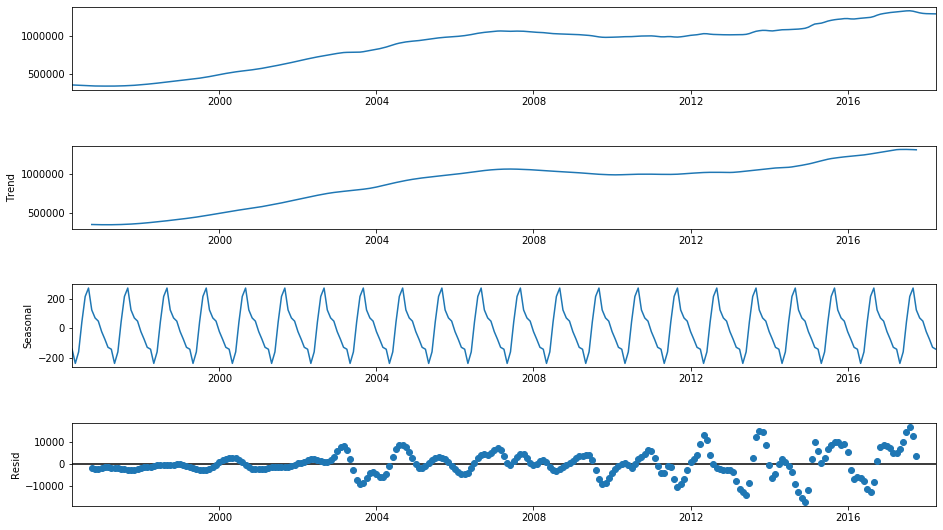

In [74]:
# Checking the decomposed seasonal trends:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(one_zip)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [75]:
# Test Stationarity - Appears to not be stationary without any differencing

from statsmodels.tsa.stattools import adfuller

adfuller(one_zip)

(-2.563886562867809,
 0.10069322265751685,
 15,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 4290.592655898536)

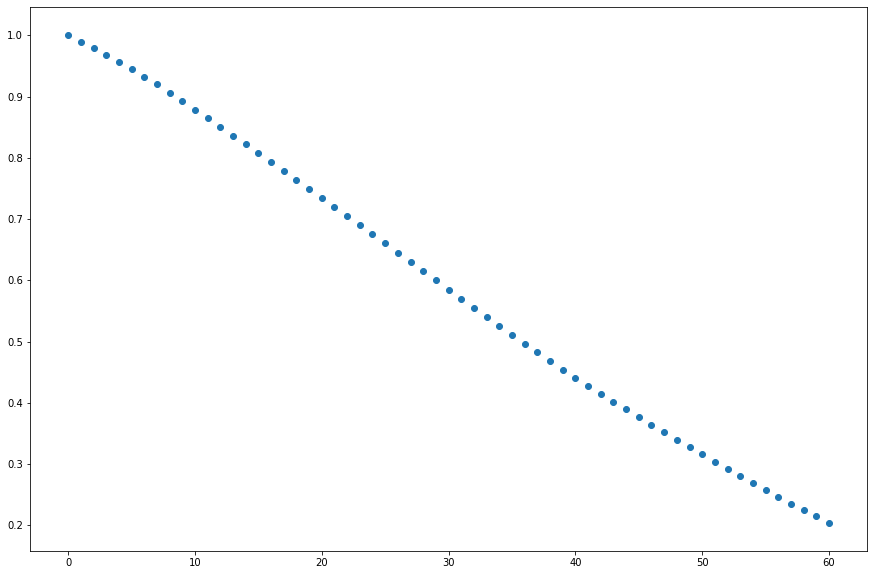

In [91]:
# Checking the autocorrelation/partial autocorrelation:
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(15,10))
fig = plt.scatter(x = range(0,61), y=acf(one_zip, nlags=60, fft=True).ravel())


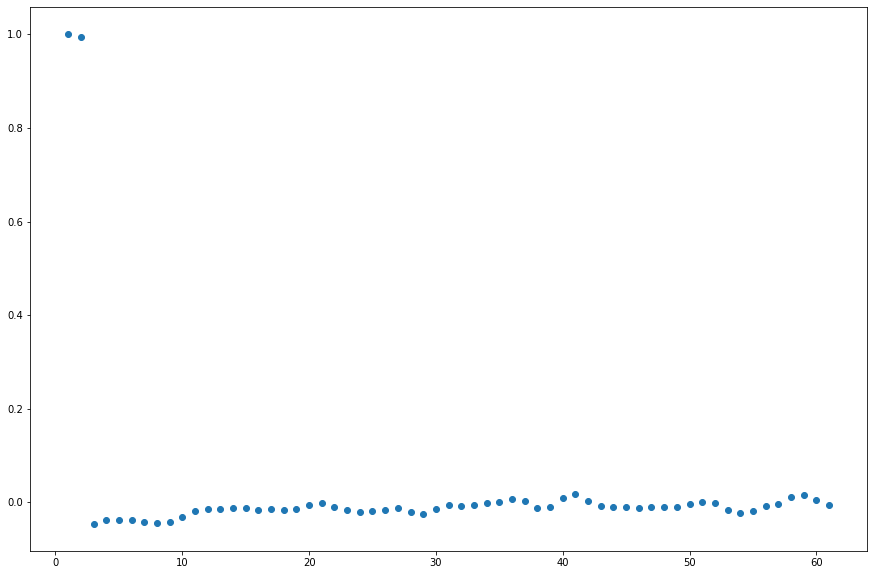

In [90]:
fig = plt.figure(figsize=(15,10))
fig = plt.scatter(x = range(1,62), y=pacf(one_zip, nlags=60).ravel())

In [ ]:
# Let's try a quick ARIMA model:

from statsmodels.tsa.arima_model import ARIMA



In [97]:
melted[melted.RegionName == 1001].head()

,RegionName,City,State,Metro,CountyName,time,value,year
5850,1001,Agawam,MA,Springfield,Hampden,1996-04-01,113100.00000,1996
20573,1001,Agawam,MA,Springfield,Hampden,1996-05-01,112800.00000,1996
35296,1001,Agawam,MA,Springfield,Hampden,1996-06-01,112600.00000,1996
50019,1001,Agawam,MA,Springfield,Hampden,1996-07-01,112300.00000,1996
64742,1001,Agawam,MA,Springfield,Hampden,1996-08-01,112100.00000,1996


In [98]:
melted.value.isna().sum()

0

In [106]:
zip_df = melted.pivot_table(index='time', columns='RegionName', values='value')
zip_df

RegionName,1001,1002,1005,1007,1008,1010,1011,1013,1020,1026,...,99654,99664,99669,99701,99705,99709,99712,99801,99835,99901
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,113100.00000,161000.00000,103100.00000,133400.00000,117500.00000,115800.00000,87000.00000,88500.00000,97200.00000,91200.00000,...,122700.00000,112200.00000,112500.00000,89400.00000,101900.00000,103000.00000,109200.00000,166800.00000,155500.00000,117100.00000
1996-05-01,112800.00000,160100.00000,103400.00000,132700.00000,117300.00000,115700.00000,87000.00000,88500.00000,97100.00000,91100.00000,...,124200.00000,112400.00000,113100.00000,89800.00000,102900.00000,103900.00000,109600.00000,166200.00000,154900.00000,117200.00000
1996-06-01,112600.00000,159300.00000,103600.00000,132000.00000,117100.00000,115500.00000,87100.00000,88400.00000,97000.00000,91000.00000,...,125700.00000,112600.00000,113800.00000,90200.00000,103800.00000,104700.00000,110000.00000,165400.00000,154200.00000,117300.00000
1996-07-01,112300.00000,158600.00000,103800.00000,131400.00000,117000.00000,115300.00000,87200.00000,88300.00000,96800.00000,90800.00000,...,127200.00000,112800.00000,114400.00000,90600.00000,104700.00000,105500.00000,110400.00000,164400.00000,153500.00000,117400.00000
1996-08-01,112100.00000,158000.00000,103900.00000,130800.00000,116800.00000,115100.00000,87400.00000,88200.00000,96600.00000,90700.00000,...,128600.00000,113000.00000,115100.00000,91000.00000,105400.00000,106200.00000,110800.00000,163500.00000,152800.00000,117500.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,221700.00000,342000.00000,213300.00000,268100.00000,205400.00000,243800.00000,151400.00000,173300.00000,187400.00000,201200.00000,...,258800.00000,219100.00000,250200.00000,206700.00000,261100.00000,262800.00000,273500.00000,402300.00000,396200.00000,291900.00000
2018-01-01,221700.00000,344500.00000,215600.00000,268100.00000,204500.00000,244600.00000,150100.00000,174600.00000,188100.00000,204600.00000,...,259400.00000,218900.00000,250600.00000,206100.00000,261300.00000,262800.00000,273800.00000,406200.00000,397500.00000,294200.00000
2018-02-01,221700.00000,347400.00000,217900.00000,268800.00000,206800.00000,246700.00000,150100.00000,175900.00000,189000.00000,211200.00000,...,259900.00000,218300.00000,250100.00000,205600.00000,261400.00000,262300.00000,273800.00000,409800.00000,398900.00000,297500.00000


In [107]:
zip_df.isna().sum().value_counts().sort_index()

0      13684
15         1
21         2
87       118
93        31
99        21
105       52
107       13
111       78
117       56
123       27
129       20
135        7
141        6
147        9
153       11
159        7
165        1
167      230
171       41
177       33
183       24
189       27
195       18
201       55
207       42
213       53
219       56
dtype: int64

## Project Plan
1) Shape data by zipcode(columns), indexed by date

2) Test models on 1 zipcode, outputting best model (accuracy measure?) and best differencing params

3) Create decision function based off ROI adjusted for loss scenarios/conf int.

4) Test models on 10 zipcodes, outputting best model (accuracy measure?), best differencing params for each zipcode, as well as largest predicted ROI

5) Test models on all zipcodes as in step 4

6) Modular add-ons (rent offset, performance over time, etc.)

In [ ]:
# Notes from checkin:

# Results by client class, who can take advantage of x? Do you need minimum amount of capital etc.?

